In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
df_date = pd.read_csv('../CSV_limpios/df_date.csv')

In [70]:
df_date

,date,Latitud,Longitud,Alcaldia,Alcaldia_num,AQI,Crimenes
date,,,,,,,
2016-01-01,2016-01-01,19.370464,-99.159599,BENITO JUAREZ,1,184,7
2016-01-01,2016-01-01,19.365313,-99.291702,CUAJIMALPA DE MORELOS,5,164,10
2016-01-01,2016-01-01,19.411617,-99.152206,CUAUHTEMOC,8,178,12
2016-01-01,2016-01-01,19.384413,-99.117638,IZTACALCO,3,187,12
2016-01-01,2016-01-01,19.404051,-99.202660,MIGUEL HIDALGO,9,180,6
...,...,...,...,...,...,...,...
2020-12-31,2020-12-31,19.370464,-99.159599,BENITO JUAREZ,1,117,2
2020-12-31,2020-12-31,19.357357,-99.262863,CUAJIMALPA DE MORELOS,5,97,2
2020-12-31,2020-12-31,19.482700,-99.094521,GUSTAVO A MADERO,12,128,24


In [69]:
df_date['date'] = pd.to_datetime(df_date.date, format='%Y.%m.%d')

In [33]:
df_date.index = pd.to_datetime(df_date['date'], format="%Y.%m.%d")

<AxesSubplot:xlabel='date'>

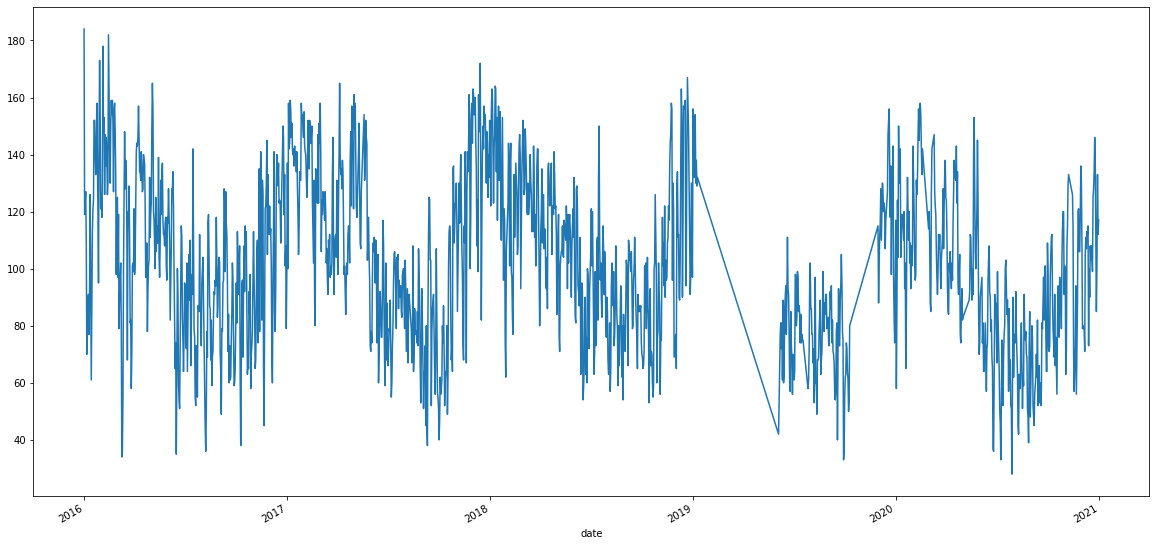

In [82]:
AQI = df_date[(df_date['Alcaldia'] == "BENITO JUAREZ")]["AQI"]
plt.figure(figsize=(20, 10))
AQI.plot()

In [10]:
import pandas as pd
from scipy import stats
import numpy as np

df_crimen = pd.read_csv("../CSV_limpios/crimen.csv")
df_aire = pd.read_csv("../CSV_limpios/aire.csv")


aire_map = pd.read_csv("../CSV_limpios/aire_v2.csv")
crime_map = pd.read_csv("../CSV_limpios/crimen_v2.csv")

#Con Ozono

#df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
#df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_all = pd.DataFrame()
df_all['ID'] = df_aire['ID']
df_all['Dia'] = df_aire['Dia']
df_all['Mes'] = df_aire['Mes']
df_all['Anio'] = df_aire['Anio']
df_all['Alcaldia'] = df_aire['Alcaldia']
df_all['Latitud'] = df_aire['Latitud']
df_all['Longitud'] = df_aire['Longitud']
df_all['Crimenes'] = df_crimen['countCrimenes']
df_all['AQI'] = df_aire['avgAQI']

def prepare_dataset_relationship(df_all):
    
    df_all_copy = df_all.copy()
    alc_mapper = {"BENITO JUAREZ": 1,
              "VENUSTIANO CARRANZA": 2,
              "IZTACALCO": 3,
              "TLALPAN": 4,
              "CUAJIMALPA DE MORELOS": 5,
              "TLAHUAC": 6,
              "AZCAPOTZALCO": 7,
              "CUAUHTEMOC": 8,
              "MIGUEL HIDALGO": 9,
              "IZTAPALAPA": 10,
              "ALVARO OBREGON": 11,
              "GUSTAVO A MADERO": 12,
              "MILPA ALTA": 13,
              "COYOACAN":14}
    df_all_copy['Alcaldia_num'] = df_all_copy['Alcaldia'].replace(alc_mapper)

    df_all_copy["r"] = 0
    df_all_copy["p value"] = 0
    df_all_copy["% / 10 AQI"] = 0

    for Alcaldia in df_all_copy['Alcaldia_num'].unique():
        for anio in df_all_copy['Anio'].unique():
            df_test = df_all_copy[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio)]
            df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)

            if(len(df_test.AQI) > 1):
                pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

                df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
                slope = df_all_fit[0]
                percentage = (slope*1000)/df_test["Crimenes"].max()

                r = round(pearson_coef, 5)
                p = round(p_value, 5)

                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'r'] = r
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'p value'] = p
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), "% / 10 AQI"] = round(percentage,5)

    return df_all_copy

df_prepared = prepare_dataset_relationship(df_all)
df_prepared = df_prepared[['ID', 'Dia', 'Mes', 'Anio', 'Latitud', 'Longitud', 'Alcaldia', 'Alcaldia_num', 'AQI', 'Crimenes', 'r', 'p value', '% / 10 AQI']]
df_prepared

,ID,Dia,Mes,Anio,Latitud,Longitud,Alcaldia,Alcaldia_num,AQI,Crimenes,r,p value,% / 10 AQI
0,1_1_2016_AZCAP,1,1,2016,19.468405,-99.169792,AZCAPOTZALCO,7,206,7,0.01273,0.82162,0.07958
1,1_1_2016_BENIT,1,1,2016,19.370464,-99.159599,BENITO JUAREZ,1,184,7,0.04583,0.38995,0.31513
2,1_1_2016_CUAJI,1,1,2016,19.365313,-99.291702,CUAJIMALPA DE MORELOS,5,164,10,0.05489,0.40533,0.27603
3,1_1_2016_CUAUH,1,1,2016,19.411617,-99.152206,CUAUHTEMOC,8,178,12,0.09876,0.06456,0.54579
4,1_1_2016_IZTAC,1,1,2016,19.384413,-99.117638,IZTACALCO,3,187,12,0.13991,0.01036,0.74039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,31_12_2020_BENIT,31,12,2020,19.370464,-99.159599,BENITO JUAREZ,1,117,2,0.32307,0.00000,1.87021
15077,31_12_2020_CUAJI,31,12,2020,19.357357,-99.262863,CUAJIMALPA DE MORELOS,5,97,2,0.18270,0.00157,1.24598
15078,31_12_2020_GUSTA,31,12,2020,19.482700,-99.094521,GUSTAVO A MADERO,12,128,24,0.15550,0.02790,0.97144
15079,31_12_2020_IZTAP,31,12,2020,19.360794,-99.073883,IZTAPALAPA,10,127,15,0.38522,0.00000,1.97916


In [11]:
from pathlib import Path  
filepath = Path('../CSV_limpios/df_air_crime_evaluation.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df_prepared.to_csv(filepath) 

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

df_crimen = pd.read_csv("../CSV_limpios/crimen.csv")
df_aire = pd.read_csv("../CSV_limpios/aire.csv")


aire_map = pd.read_csv("../CSV_limpios/aire_v2.csv")
crime_map = pd.read_csv("../CSV_limpios/crimen_v2.csv")

In [53]:
aire_map = pd.read_csv("../CSV_limpios/aire_v2.csv")
crime_map = pd.read_csv("../CSV_limpios/crimen_v2.csv")


df_all = pd.read_csv("../CSV_limpios/df_air_crime_evaluation.csv")
#df_all = pd.read_csv("../CSV_limpios/df_air_crime_evaluation_o3.csv")

models = {
     "BENITO JUAREZ": [1, 214.9126391708, -0.0018374312, 0.0302102129, -0.1055739376, 0.0058998541, 24.6],
     "CUAJIMALPA DE MORELOS": [5, -40.077475915, -0.0020568653, -0.0054645416, 0.0204733694, 0.0007117387, 77.75],
     "CUAUHTEMOC": [8, -1429.8475079076, -0.0158129401, 0.029503595, 0.7116424221, 0.0032419824, 20.17],
     "IZTACALCO": [3, -449.6763203576, 0.0038919214, 0.0508705173, 0.2237442662, 0.0101261185, 27.55],
     "MIGUEL HIDALGO": [9, -1781.1780802088, 0.0027193564, 0.1020666467, 0.8840865336, 0.0021126176, 34.07],
     "TLAHUAC": [6, -267.7351537166, -0.0019352763, -0.0148895216, 0.1337588241, 0.000818561, 47.4],
     "TLALPAN": [4, -737.6545789514, 0.0059929009, 0.0060511696, 0.3673142828, -0.0034980614, 29.05],
     "VENUSTIANO CARRANZA": [2, -393.2098159588, -0.0052166789, -0.0281358348, 0.1964024774, 0.0030982005, 24.55],
     "AZCAPOTZALCO": [7, -159.1142355563, -0.0040754038, -0.0003299716, 0.0796972529, 0.0093918495, 27.84],
     "IZTAPALAPA": [10, 456.3869000885, 0.0044874625, -0.0774887946, -0.2225607627, 0.0122347371, 13.31],
     "MILPA ALTA": [13, -80.3076370813, -0.0003960816, -0.0046275519, 0.0404109748, -0.0003385311, 88.83],
     "GUSTAVO A MADERO": [12, 4951.1519849232, -0.0192311166, -0.2230044121, -2.4476907629, 0.0002629555, 24.51],
     "ALVARO OBREGON": [11, 3388.9302909273, -0.0183477195, -0.1446136909, -1.6755320747, 0.00319275, 29.91],
    }

crime_mapper = {1:[1, 5], 2:[6, 10], 3:[11, 15], 4:[16, 20], 5:[21, 25], 6:[26, 30], 7:[31, 35], 8:[36, 40], 9:[41, 45], 10:[46, 50], 11:[51, 55], 12:[56, 60]}

def get_prediction(dia, mes, anio, aqi, alcaldia):
    time = [dia, mes, anio, aqi]
    prediction = models[alcaldia][1]
    print(time, prediction)
    for i in range(len(models[alcaldia])-3):
        prediction = prediction + models[alcaldia][i+2]*time[i]
        print(prediction)

    if(prediction<0):
        prediction = 1
    
    print(prediction)
    print(((math.modf(prediction)[0])*5%100), crime_mapper[math.floor(prediction)][0])

        
    round_prediction = round(((math.modf(prediction)[0])*5%100) + crime_mapper[math.floor(prediction)][0])
    
    return f'{round_prediction} violent crimes, model accuracy: {models[alcaldia][-1]}%'

In [13]:
df_all[(df_all["Anio"] == 2019) & (df_all["Alcaldia"] == "GUSTAVO A MADERO")]

,Unnamed: 0,ID,Dia,Mes,Anio,Latitud,Longitud,Alcaldia,Alcaldia_num,AQI,Crimenes,r,p value,% / 10 AQI
9189,9189,3_1_2019_GUSTA,3,1,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,150,40,0.06655,0.2352,0.29817
9200,9200,4_1_2019_GUSTA,4,1,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,150,36,0.06655,0.2352,0.29817
9211,9211,5_1_2019_GUSTA,5,1,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,165,28,0.06655,0.2352,0.29817
9222,9222,6_1_2019_GUSTA,6,1,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,147,16,0.06655,0.2352,0.29817
9233,9233,7_1_2019_GUSTA,7,1,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,154,56,0.06655,0.2352,0.29817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,12434,18_12_2019_GUSTA,18,12,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,150,40,0.06655,0.2352,0.29817
12445,12445,19_12_2019_GUSTA,19,12,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,157,34,0.06655,0.2352,0.29817
12456,12456,20_12_2019_GUSTA,20,12,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,164,31,0.06655,0.2352,0.29817
12467,12467,21_12_2019_GUSTA,21,12,2019,19.4827,-99.094521,GUSTAVO A MADERO,12,153,27,0.06655,0.2352,0.29817


In [31]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline
import plotly.express as px
from scipy import stats

option_slctd = 2019
alcaldia_slct = "GUSTAVO A MADERO"

df_all_plot = df_all[(df_all["Anio"] == option_slctd) & (df_all["Alcaldia"] == alcaldia_slct)]

figure = px.scatter(data_frame = df_all_plot, x="AQI",
                y="Crimenes", 
                trendline="ols", 
                title="Relationship between Crime & AQI - {} in {}".format(option_slctd, alcaldia_slct),
                hover_data=["r", "p value", "% / 10 AQI", "ID"])
figure.show()

In [54]:
get_prediction(16, 12, 2022, 70, alcaldia_slct)

[16, 12, 2022, 70] 4951.1519849232
4950.8442870576
4948.1682341124
-1.062488471400684
-1.0440815864006838
1
0.0 1


'1 violent crimes, model accuracy: 24.51%'